In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools

def draw_gambler(results):
    plt.figure(figsize=(8, 8))
    for r in results:
        plt.plot(r[0], label = r[1])
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')
    plt.show()

def q2v(Q, state_action):
    v = []
    for s in sorted(list(Q.keys())):
        v.append(np.max(Q[s]))
    return v

def draw_policy(Q, state_action):
    plt.figure(figsize=(8, 8))
    policy = []
    for s in sorted(list(Q.keys())):
        policy.append(state_action[s][np.argmax(Q[s])])
    plt.scatter(list(range(min(Q.keys()), max(Q.keys())+1)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()
    
def herman_worst(env, v, M):
    val, idx, i = [], [], 0
    for i in range(len(env.get_all_state())): 
        if len(env.get_state_name(i)) == M:
            val.append(v[i])
            idx.append(i)
    name = env.get_state_name(idx[np.argmax(val)])
    r = np.max(val)
    return val, name, r
    
%load_ext autoreload
%autoreload 2

# Chapter 4 Dynamic Programming

### 4.1 Use MC to evaluate V

code see [DP](./c04_mc.py#11)

<img src="./avatar/c04_1.png" alt="dp for V" width="600" style='float:left'/>

CPU times: user 3.09 ms, sys: 44 µs, total: 3.13 ms
Wall time: 3.17 ms
CPU times: user 459 µs, sys: 13 µs, total: 472 µs
Wall time: 464 µs
CPU times: user 44 ms, sys: 1.4 ms, total: 45.4 ms
Wall time: 44.9 ms


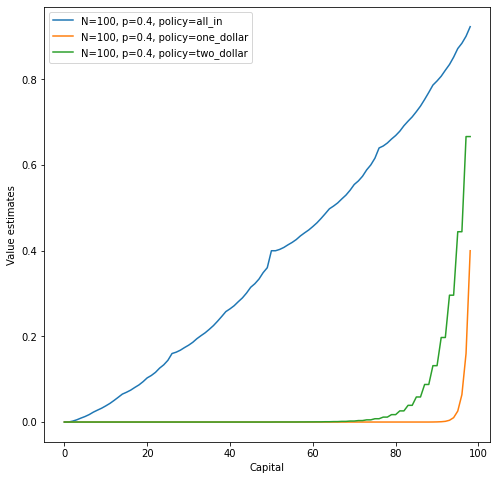

In [2]:
from c00_env import GamblerEnv, GamblerPolicy
from c04_dp import DP

env = GamblerEnv(N=100, p=0.4, include_terminate_state=False, seed=11)
dp = DP(env)
%time v_1 = dp.fit_v(policy=GamblerPolicy['all_in'], epochs=10000)
%time v_2 = dp.fit_v(policy=GamblerPolicy['one_dollar'], epsilon=10000)
%time v_3 = dp.fit_v(policy=GamblerPolicy['two_dollar'], epochs=20000)

draw_gambler([
    (v_1, 'N={}, p={}, policy={}'.format(100, 0.4, 'all_in')),
    (v_2, 'N={}, p={}, policy={}'.format(100, 0.4, 'one_dollar')),
    (v_3, 'N={}, p={}, policy={}'.format(100, 0.4, 'two_dollar')),
])

In [3]:
from c00_env import HermanEnv, HermanPolicy
from c04_dp import DP

env = HermanEnv(N=7, M=3, p=0.5, seed=11)
dp = DP(env)
%time v_1 = dp.fit_v(policy=HermanPolicy['random'], epochs=10000)

print(v_1, np.max(v_1), env.get_state_name(np.argmax(v_1)))
for i in range(len(v_1)):
    print(env.get_state_name(i), ":", v_1[i])

CPU times: user 3.64 ms, sys: 486 µs, total: 4.12 ms
Wall time: 3.86 ms
[2.8571 4.5714 5.1428 6.857 ] 6.857 (0, 2, 4)
(0, 1, 2) : 2.8571
(0, 1, 3) : 4.5714
(0, 1, 4) : 5.1428
(0, 2, 4) : 6.857


In [4]:
from c00_env import HermanEnv, HermanPolicy
from c04_dp import DP

env = HermanEnv(N=7, M=5, p=0.5, seed=11)
dp = DP(env)
%time v_1 = dp.fit_v(policy=HermanPolicy['random'], epochs=10000)

print(v_1, np.max(v_1), env.get_state_name(np.argmax(v_1)))
for i in range(len(v_1)):
    print(env.get_state_name(i), ":", v_1[i])

CPU times: user 7.11 ms, sys: 1.43 ms, total: 8.54 ms
Wall time: 7.41 ms
[5.0185 5.9734 5.305  2.8571 4.5714 5.1428 6.8571] 6.8571 (0, 2, 4)
(0, 1, 2, 3, 4) : 5.0185
(0, 1, 2, 3, 5) : 5.9734
(0, 1, 2, 4, 5) : 5.305
(0, 1, 2) : 2.8571
(0, 1, 3) : 4.5714
(0, 1, 4) : 5.1428
(0, 2, 4) : 6.8571


In [5]:
from c00_env import HermanEnv
from c04_dp import DP

env = HermanEnv(N=7, M=5, p=0.5, seed=11)
dp = DP(env)
%time v_2 = dp.fit_v(policy=HermanPolicy['random'], epochs=10000)
val, name, r = herman_worst(env, v_2, M=5)
print(f"The Max is {name} = {r}")

CPU times: user 7.19 ms, sys: 881 µs, total: 8.07 ms
Wall time: 7.58 ms
The Max is (0, 1, 2, 3, 5) = 5.9734


N = 3 M = 3
CPU times: user 374 µs, sys: 87 µs, total: 461 µs
Wall time: 400 µs
N = 5 M = 3
CPU times: user 796 µs, sys: 163 µs, total: 959 µs
Wall time: 800 µs
N = 5 M = 5
CPU times: user 1.73 ms, sys: 324 µs, total: 2.05 ms
Wall time: 2 ms
N = 7 M = 3
CPU times: user 2.36 ms, sys: 294 µs, total: 2.65 ms
Wall time: 2.45 ms
N = 7 M = 5
CPU times: user 6.06 ms, sys: 324 µs, total: 6.39 ms
Wall time: 6.1 ms
N = 7 M = 7
CPU times: user 10.4 ms, sys: 444 µs, total: 10.8 ms
Wall time: 10.4 ms
N = 9 M = 3
CPU times: user 5.85 ms, sys: 393 µs, total: 6.24 ms
Wall time: 6.04 ms
N = 9 M = 5
CPU times: user 31.1 ms, sys: 704 µs, total: 31.8 ms
Wall time: 31.2 ms
N = 9 M = 7
CPU times: user 65.7 ms, sys: 897 µs, total: 66.6 ms
Wall time: 66.2 ms
N = 9 M = 9
CPU times: user 100 ms, sys: 1.4 ms, total: 102 ms
Wall time: 102 ms
N = 11 M = 3
CPU times: user 12.5 ms, sys: 703 µs, total: 13.3 ms
Wall time: 12.7 ms
N = 11 M = 5
CPU times: user 128 ms, sys: 1.53 ms, total: 129 ms
Wall time: 129 ms
N = 11

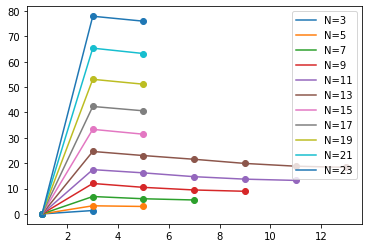

In [6]:
from c00_env import HermanEnv, HermanPolicy
from c04_dp import DP

results = {}
for N in range(3, 14, 2):
    arr = np.zeros( int((N + 1) / 2) )
    for M in range(3, N+1, 2):
        print("N =",N, "M =",M)
        env = HermanEnv(N=N, M=M, p=0.5, seed=11)
        dp = DP(env)
        %time v = dp.fit_v(policy=HermanPolicy['random'], epochs=10000)
        val, name, r = herman_worst(env, v, M=M)
        arr[int((M - 1) / 2)] = r
    results[f"N={N}"] = arr

for N in range(15, 24, 2):
    arr = np.zeros(3)
    for M in range(3, 6, 2): # M can't be too large, > 9 is minutes level. C(21, 9) - C(21, 7) = 116280
        print("N =",N, "M =",M)
        env = HermanEnv(N=N, M=M, p=0.5, seed=11)
        dp = DP(env)
        %time v = dp.fit_v(policy=HermanPolicy['random'], epochs=10000)
        val, name, r = herman_worst(env, v, M=M)
        arr[int((M - 1) / 2)] = r
    results[f"N={N}"] = arr
x = list(range(1, 24, 2))
for k, v in results.items():
    print(k, ":", v)
    plt.plot(x[:len(v)], v, label = k, linestyle="-")
    plt.scatter(x[:len(v)], v)
plt.legend()
plt.show()

##### compare with official image:

<img src="https://www.prismmodelchecker.org/images/graphs/self.stabilisation.herman.png" alt="herman pic" width="500" style='float:left'/>

N = 3
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
N = 5
CPU times: user 3 µs, sys: 46 µs, total: 49 µs
Wall time: 15 µs
N = 7
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
N = 9
CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11.7 µs
N = 11
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
N = 13
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
N = 15
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.82 µs


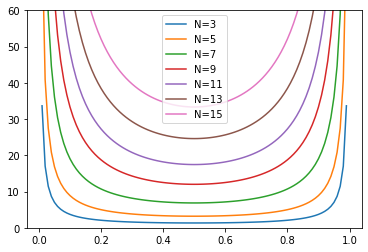

In [7]:
from c00_env import HermanEnv, HermanPolicy
from c04_dp import DP

results = {}
for N in range(3, 16, 2):
    arr = np.zeros(99)
    env = HermanEnv(N=N, M=3, p=0.5, seed=11)
    print("N =", N)
    %time 
    for i, p in enumerate(np.linspace(0.01, 0.99, 99)):
        env.p = p  # save time
        dp = DP(env)
        v = dp.fit_v(policy=HermanPolicy['random'], epochs=10000)
        val, name, r = herman_worst(env, v, M=3)
        arr[i] = r
    results[f"N={N}"] = arr
# print(f"The Max is {name} = {r}")
x = list(np.linspace(0.01, 0.99, 99))
plt.ylim([0, 60])

for k, v in results.items():
    plt.plot(x[:len(v)], v, label = k, linestyle="-")
plt.legend()
plt.show()

<img src="https://www.prismmodelchecker.org/images/graphs/self.stabilisation.herman.p.png" alt="herman" width="600" style='float:left'/>

N = 7
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
N = 9
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
N = 11
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


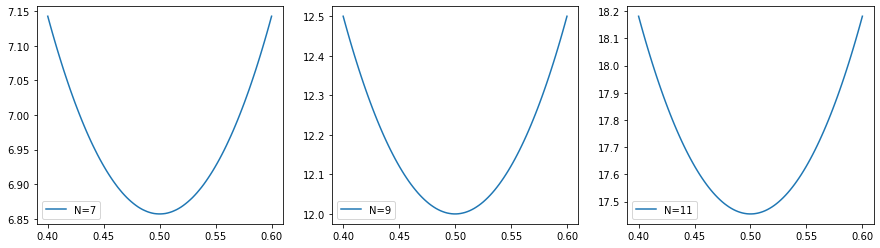

In [8]:
from c00_env import HermanEnv, HermanPolicy
from c04_dp import DP

results = {}
for N in range(7, 13, 2):
    arr = np.zeros(100)
    env = HermanEnv(N=N, M=3, p=0.5, seed=11)
    print("N =", N)
    %time
    for i, p in enumerate(np.linspace(0.4, 0.6, 100)):
        env.p = p  # save time
        dp = DP(env)
        v = dp.fit_v(policy=HermanPolicy['random'], epochs=10000)
        val, name, r = herman_worst(env, v, M=3)
        arr[i] = r
    results[f"N={N}"] = arr

x = list(np.linspace(0.4, 0.6, 100))
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for i, k in enumerate(results.keys()):
    v = results[k]
    axs[i].set
    axs[i].plot(x[:len(v)], v, label = k, linestyle="-")
    axs[i].legend()
plt.show()

# OOh, no! 

i don't know why my result is not in correspond with the official reuslt..

<img src="https://www.prismmodelchecker.org/images/graphs/self.stabilisation.herman.p7.png" alt="herman" width="300" style='float:left'/>

<img src="https://www.prismmodelchecker.org/images/graphs/self.stabilisation.herman.p9.png" alt="herman" width="300" style='float:left'/>

<img src="https://www.prismmodelchecker.org/images/graphs/self.stabilisation.herman.p11.png" alt="herman" width="300" style='float:left'/>

### 4.2 Use DP to evaluate optimal policy

slight different from 5.2

code see [OnlineMCSoft](./c05_mc.py#L129)

<img src="./avatar/c04_3.png" alt="mc for V" width="600" style='float:left'/>

CPU times: user 4.38 ms, sys: 131 µs, total: 4.51 ms
Wall time: 4.5 ms
1 [0.043463]
2 [0.100506 0.108658]
3 [0.173848 0.186076 0.186076]
4 [0.271644 0.251266 0.251266 0.271644]
5 [0.349051 0.336834 0.336834 0.349051 0.4     ]
6 [0.46519  0.434619 0.434619 0.46519 ]
7 [0.550754 0.562975 0.562975]
8 [0.660749 0.67911 ]
9 [0.807438]


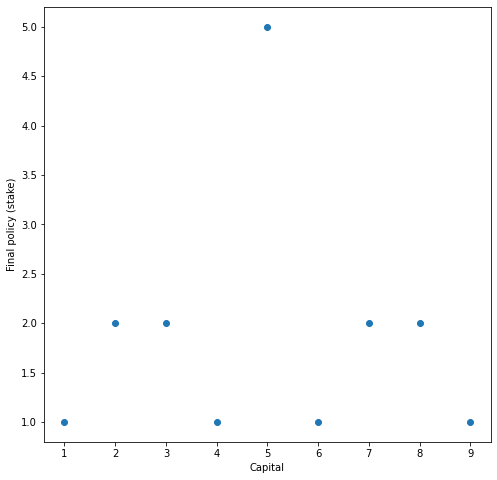

In [9]:
from c00_env import GamblerEnv
from c04_dp import DP

env = GamblerEnv(N=10, p=0.4, include_terminate_state=False, seed=11)
dp = DP(env)
%time q_value = dp.fit_q(epochs=10)

for k, v in q_value.items():
    print(k, v)
draw_policy(q_value, env.get_all_state_action())

CPU times: user 347 ms, sys: 5.46 ms, total: 352 ms
Wall time: 378 ms


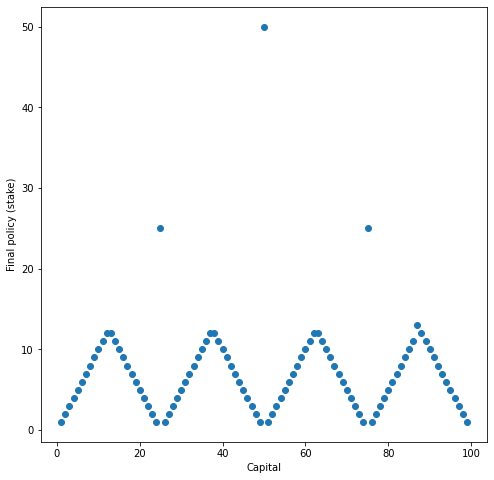

In [10]:
from c00_env import GamblerEnv
from c04_dp import DP

env = GamblerEnv(N=100, p=0.4, include_terminate_state=False, seed=11)
dp = DP(env)
%time q_value = dp.fit_q(epochs=10000)

draw_policy(q_value, env.get_all_state_action())

CPU times: user 1.62 s, sys: 20.3 ms, total: 1.64 s
Wall time: 2.35 s


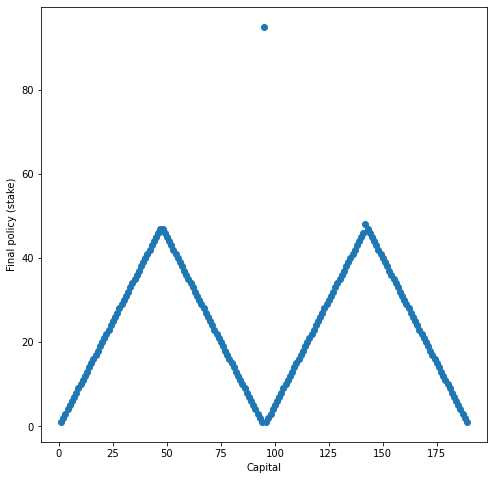

In [11]:
from c00_env import GamblerEnv
from c04_dp import DP

env = GamblerEnv(N=190, p=0.4, include_terminate_state=False, seed=11)
dp = DP(env)
%time q_value = dp.fit_q(epochs=10000)

draw_policy(q_value, env.get_all_state_action())